In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
#function that makes two plots (and saves them in the current directory):
#       - membrane potential vs time + input current vs time
#       - phase portait i.e. recovery variable vs membrane potential
#the functionn takes in input: name of the feature, timestep, array of time instants, the 5 parameters of the Izhikevich model, and the initial values of u and w 

def neuronplot(feature,dt,t,I,a,b,c,d,u0,w0):

    fig = plt.figure(figsize=(20, 10))
    ax0 = fig.add_subplot(221) 
    ax1 = fig.add_subplot(223, sharex=ax0)
    ax2 = fig.add_subplot(122) 

    fig.suptitle(feature, fontsize = 18)
    ax0.title.set_text('Membrane Potential Time Course')
    ax2.title.set_text('Phase Portrait')

    ax1.plot(t,I)
    ax1.set(xlabel='time [ms]', ylabel='Input Current [pA]')
    uu=np.zeros(len(t))
    ww=np.zeros(len(t))
    #uu=np.zeros(len(t))
    #ww=np.zeros(len(t))

    #initial values
    uu[0]= u0
    ww[0]= w0
    
    u =u0
    w = w0
    
    #numerical integration
    for j in range (0,len(t)-1):

        u= u+dt*(0.04*(u)**2+5*u+140-w+I[j])
        w= w+dt*a*(b*u-w)
        
        if u > 30:
            uu[j+1] = 30
            u = c
            w = w + d
        else:
            uu[j+1] = u
        ww[j+1] = w
        
    ax0.plot(t,uu)
    ax0.set(xlabel='time [ms]', ylabel='Membrane Potential u [mv]')

    ax2.plot(uu,ww)
    ax2.set(xlabel='Membrane Potential u [mV]', ylabel='Recovery Variable w [a.u.]')

    plt.savefig(feature,format='pdf')
    plt.show()



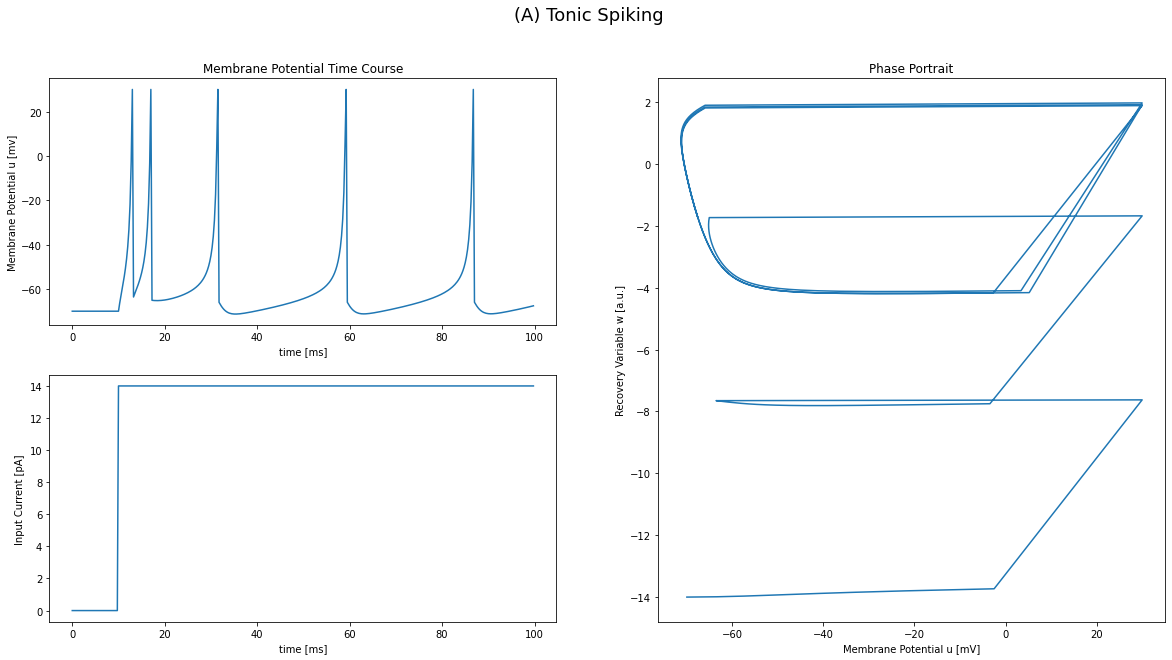

In [12]:
#(A) Tonic Spiking
feature = '(A) Tonic Spiking'
dt=0.25 #timestep [ms]
tmax=100 #ms

#input current
t_input=int(tmax/10)
I_excitatory = 14
t=np.arange(0,tmax,dt)
I=np.zeros(len(t))
I[int(t_input/dt):]=I_excitatory

#initial conditions
a=0.02
b=0.2
c=-65
d=6
u0 = -70
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)